In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from import_me import *

In [2]:
# array = readSave(readfileName = "output.data")
# plt.imshow(plt.imread("output.bmp"))

In [55]:
with open("penguin.bmp", "rb")as f:
    _ = f.read()
orig = np.frombuffer(_, dtype = np.uint8)

In [79]:
orig

array([ 66,  77, 138, ..., 206, 139,  82], dtype=uint8)

In [56]:
header = orig[:122]
#preamble = np.unpackbits(preamble)

In [166]:
# %%time
# img = readOutput("output.data", np.array([67, 255], dtype = np.uint8), header, (450, 600))
# plt.imshow(img)

# # Photographer: Wolfgang Kaehler/Getty Images

In [111]:
def findBitShift_and_Begin2(rcv_bitmap):
    for i in range(8):
        aux = search_sequence_numpy(np.packbits(np.roll(np.unpackbits(rcv_bitmap), i)), np.array([66, 77, 138]))
        if len(aux) != 0:
            return (i, aux[0])

In [112]:
def saveRcvImage2(fileName, rcv, save = False):
    tupla = findBitShift_and_Begin2(rcv)
    gravar = np.roll(np.packbits(np.roll(np.unpackbits(rcv), tupla[0])), -tupla[1])
    if save:
        with open(fileName, "wb") as f:
            f.write(gravar)
    return gravar

In [113]:
def readSave2(readfileName, savefileName = "output.bmp", save = False, delete = False):
    with open(readfileName, "rb") as f:
        b = f.read()
    rcv = np.frombuffer(b, dtype = np.uint8)
    r = saveRcvImage2(savefileName, rcv, save = save)
    if delete == True:
        os.remove(readfileName)
    return r

In [120]:
with open("output.data", "rb") as f:
    b = f.read()
rcv = np.frombuffer(b, dtype = np.uint8)

In [121]:
rcv

array([168, 113, 172, ...,  84,  56, 214], dtype=uint8)

In [122]:
array = readSave2("output.data", save = True)

In [125]:
array

array([ 66,  77, 138, ..., 206, 139,  82], dtype=uint8)

In [126]:
orig

array([ 66,  77, 138, ..., 206, 139,  82], dtype=uint8)

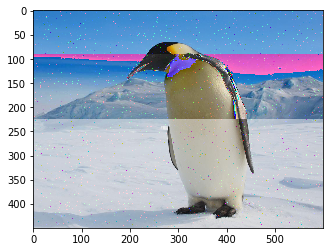

In [175]:
plt.imshow(np.flipud(cv2.cvtColor(array[122:].reshape(450, 600, 3), cv2.COLOR_BGR2RGB)).ravel().reshape(450, 600, 3))

In [127]:
orig_NoPreamble = orig[122:]

In [128]:
len(img.ravel())

810000

In [129]:
rcv = np.flipud(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)).ravel()

In [135]:
np.mean(np.equal(orig_NoPreamble, array[122:]))

0.687279012345679

In [138]:
bit_orig = np.unpackbits(orig_NoPreamble)
bit_rcv = np.unpackbits(array[122:])

In [139]:
np.mean(np.equal(bit_orig, bit_rcv))

0.8420975308641976

In [152]:
np.argwhere(np.equal(bit_orig, bit_rcv) == False)[1023208//2:][:100]

array([[4169524],
       [4169525],
       [4169527],
       [4169528],
       [4169529],
       [4169532],
       [4169533],
       [4169534],
       [4169535],
       [4169536],
       [4169537],
       [4169544],
       [4169545],
       [4169546],
       [4169548],
       [4169552],
       [4169553],
       [4169556],
       [4169557],
       [4169561],
       [4169567],
       [4169568],
       [4169569],
       [4169570],
       [4169571],
       [4169572],
       [4169575],
       [4169576],
       [4169577],
       [4169581],
       [4169583],
       [4169586],
       [4169590],
       [4169592],
       [4169593],
       [4169594],
       [4169595],
       [4169596],
       [4169599],
       [4169600],
       [4169601],
       [4169605],
       [4169607],
       [4169609],
       [4169614],
       [4169616],
       [4169617],
       [4169618],
       [4169619],
       [4169620],
       [4169623],
       [4169624],
       [4169625],
       [4169629],
       [4169631],
       [41

In [153]:
a = 4169524

In [160]:
bit_orig[a:][:200]

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1], dtype=uint8)

In [163]:
s1 = "".join([str(x) for x in bit_orig[a:][:200]])

In [157]:
bit_rcv[a:][:200]

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1], dtype=uint8)

In [26]:
def edit_distance(s, t):

    D = [[0 for n in range(len(t) + 1)] for m in range(len(s) + 1)]

    for i in range(len(s) + 1):
        D[i][0] = i
    
    for j in range(len(t) + 1):
        D[0][j] = j

    # print(D)

    for i in range(1, len(s) + 1):
        for j in range(1, len(t) + 1):
            insertion = D[i][j - 1] + 1
            deletion = D[i - 1][j] + 1
            match = D[i - 1][j - 1]
            mismatch = D[i - 1][j - 1] + 1

            if s[i - 1] == t[j - 1]:
                D[i][j] = min(insertion, deletion, match)
            else:
                D[i][j] = min(insertion, deletion, mismatch)

    return D[len(s)][len(t)]

In [164]:
s2 = "".join([str(x) for x in bit_rcv[a:][:200]])

In [165]:
edit_distance(s1, s2)

4

In [ ]:
###############

In [ ]:
%%time
img = readOutput("output.data", np.array([67 + 128, 255 - 1], dtype = np.uint8), header, (400, 600))
plt.imshow(img)

In [ ]:
####

In [ ]:
with open("red_dot.bmp", "rb")as f:
    _ = f.read()
orig = np.frombuffer(_, dtype = np.uint8)

header = orig[:122]
#preamble = np.unpackbits(preamble)

In [ ]:
# %%time
# img = readOutput("output.data", np.array([67 + 0, 255], dtype = np.uint8), header, (256, 256))
# plt.imshow(img)

In [ ]:
# %%time
# img = readOutput("output.data", np.array([67 + 128, 255 - 1], dtype = np.uint8), header, (256, 256))
# plt.imshow(img)
# # mini_header com 1 bit errado (67 -> 66) pode dar os padrão de interferência já encontrados antes quando estava
# # usando o tagged_stream_align no gnuradio, melhor não usar esse bloco (usar apenas o stream mux) e processar
# # o header em python conforme acima utilizando as funções em import_me

In [ ]:
#####

In [ ]:
with open("output.data", "rb") as f:
    b = f.read()
rcv = np.frombuffer(b, dtype = np.uint8)
#rcv = np.roll(np.packbits(np.roll(np.unpackbits(rcv), 7)), 0)

In [ ]:
rcv[:100]

In [ ]:
%%time
result = 0
for bit_shift in range(8):
    aux = np.packbits(np.roll(np.unpackbits(rcv), bit_shift))
    if len(search_sequence_numpy(aux, np.array([67, 255]))) > result:
        result = bit_shift
rcv2 = np.packbits(np.roll(np.unpackbits(rcv), result))
print(rcv2[:100])

In [ ]:
ref, result = len(rcv2), 0
for shiftByte in range(2 + 2):
    aux = np.roll(rcv2, shiftByte)
    aux = np.array([x for i, x in enumerate(aux) if i % 4 >= 2])
    _ = len(search_sequence_numpy(aux, np.array([67, 255])))
    if _ < ref:
        ref = _
        result = shiftByte
info = np.array([x for i, x in enumerate(np.roll(rcv2, result)) if i % 4 >= 2])
info[:100]

In [ ]:
info.shape

In [ ]:
#search_sequence_numpy(info, np.array([66, 77]))

In [ ]:
#findBitShift_and_Begin(info)

In [ ]:
preamble = np.array([ 66,  77, 122,   0,   3,   0,   0,   0,   0,   0, 122,   0,   0,
         0, 108,   0,   0,   0,   0,   1,   0,   0,   0,   1,   0,   0,
         1,   0,  24,   0,   0,   0,   0,   0,   0,   0,   3,   0,  19,
        11,   0,   0,  19,  11,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  66,  71,  82, 115,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0], dtype = np.uint8)
preamble = np.unpackbits(preamble)
#preamble

In [ ]:
#np.argmax(np.correlate(np.unpackbits(info), preamble))

In [ ]:
rcv_array = np.packbits(np.roll(np.unpackbits(info), -np.argmax(np.correlate(np.unpackbits(info), preamble))))

In [ ]:
bgr = np.flipud(rcv_array[122:].reshape(256, 256, 3))
plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))

In [ ]:
####

In [ ]:
with open("red_dot.bmp", "rb")as f:
    _ = f.read()
orig = np.frombuffer(_, dtype = np.uint8)

In [ ]:
orig[:122]

In [ ]:
rcv_array[:122]

In [ ]:
np.sum(np.equal(orig, rcv_array))

In [ ]:
#byte error rate
len(np.nonzero(orig - rcv_array)[0])/len(orig)

In [ ]:
#bit error rate
len(np.nonzero(np.unpackbits(orig) - np.unpackbits(rcv_array))[0]) / len(np.unpackbits(orig))

In [ ]:
# BIT ERROR RATES -> NOISE VOLTAGE = 0.7
# BCH (15, 7, t = 2): 0.00018553347227164132, 0.00021857367966248158
# Sem Codificação: 0.004680907843236924, 0.004662481573730493
# Com Hamming (7, 4): 0.0052927870685711385 (Aumento por causa do diff Encoding -> Erros Juntos).

In [ ]:
np.nonzero(np.unpackbits(orig) - np.unpackbits(rcv_array))[0][:100]